<a href="https://colab.research.google.com/github/manualrg/dslab-nlp-dl/blob/master/07_dlnlp_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attention Is All You Need

In [12]:
import typing

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [5]:
print(f"{np.__version__=}")
print(f"{pd.__version__=}")

np.__version__='2.0.2'
pd.__version__='2.2.2'


# Attention(Q, K , V)


$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$


In [10]:
def softmax(x, axis=-1):
    e_x = np.exp(x - np.max(x, axis=axis, keepdims=True))
    return e_x / np.sum(e_x, axis=axis, keepdims=True)

def scaled_dot_product_attention(Q, K, V):
    d_k = Q.shape[-1]

    # Paso 1: calcular productos punto Q x K^T
    scores = np.matmul(Q, K.T) / np.sqrt(d_k)

    # Paso 2: aplicar softmax para obtener pesos
    weights = softmax(scores, axis=-1)

    # Paso 3: aplicar los pesos a los valores V
    output = np.matmul(weights, V)

    return output, weights

# Pase Forward

In [ ]:
tokens = ["I", "like", "machine", "learning"]
np.random.seed(42)

embedding_dim = 4

 # Inicializacion
token_embeddings = np.random.randn(len(tokens), embedding_dim)
Q = K = V = token_embeddings


# Pase Forward
output, attn_weights = scaled_dot_product_attention(Q, K, V)

print("Pesos de atención (matriz):\n", np.round(attn_weights, 2))


Pesos de atención (matriz):
 [[0.54 0.34 0.06 0.05]
 [0.33 0.57 0.07 0.03]
 [0.14 0.16 0.44 0.26]
 [0.01 0.01 0.03 0.95]]


# Visualizacion

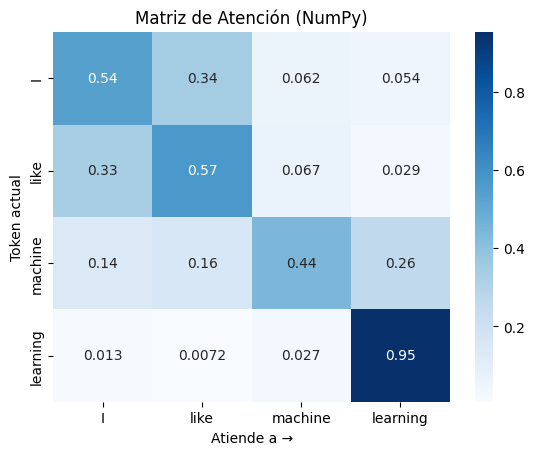

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(attn_weights, xticklabels=tokens, yticklabels=tokens, annot=True, cmap="Blues")
plt.title("Matriz de Atención (NumPy)")
plt.xlabel("Atiende a →")
plt.ylabel("Token actual")
plt.show()


# Visualizar Attencion en la ultima capa de BERT

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

model = BertModel.from_pretrained("bert-base-uncased", output_attentions=True)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

sentence = "The quick brown fox jumps over the lazy dog"
inputs = tokenizer(sentence, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)


attn_first_layer = outputs.attentions[0][0]  # Última capa, primera cabeza


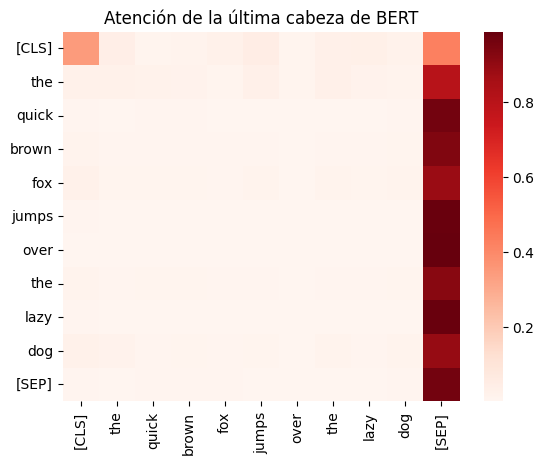

In [ ]:
attn = outputs.attentions[-1][0]  # Última capa, primera cabeza
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])


sns.heatmap(attn[0].detach().numpy(), xticklabels=tokens, yticklabels=tokens, cmap="Reds")
plt.title("Atención de la última cabeza de BERT")
plt.show()


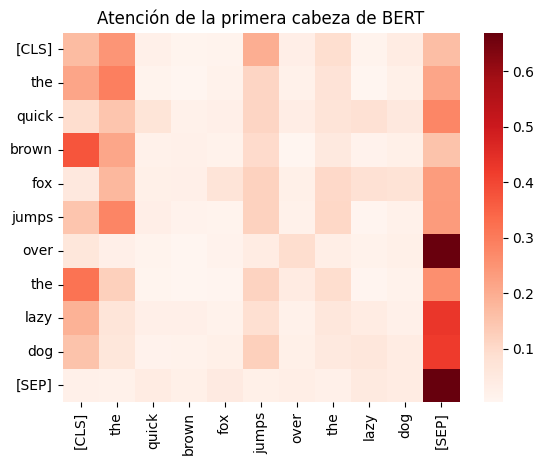

In [ ]:
attn = outputs.attentions[-2][0]


sns.heatmap(attn[0].detach().numpy(), xticklabels=tokens, yticklabels=tokens, cmap="Reds")
plt.title("Atención de la primera cabeza de BERT")
plt.show()

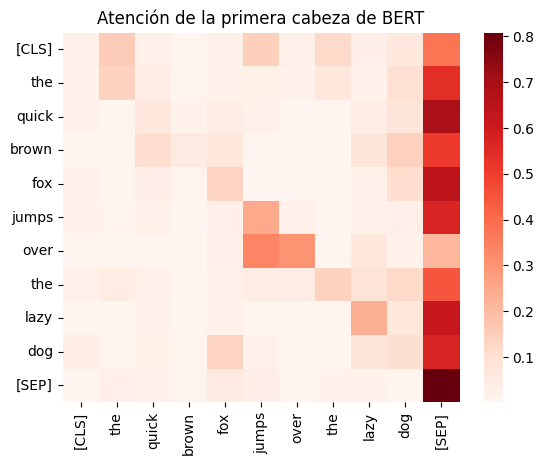

In [ ]:
attn = outputs.attentions[-3][0]  # Última capa, primera cabeza


sns.heatmap(attn[0].detach().numpy(), xticklabels=tokens, yticklabels=tokens, cmap="Reds")
plt.title("Atención de la primera cabeza de BERT")
plt.show()

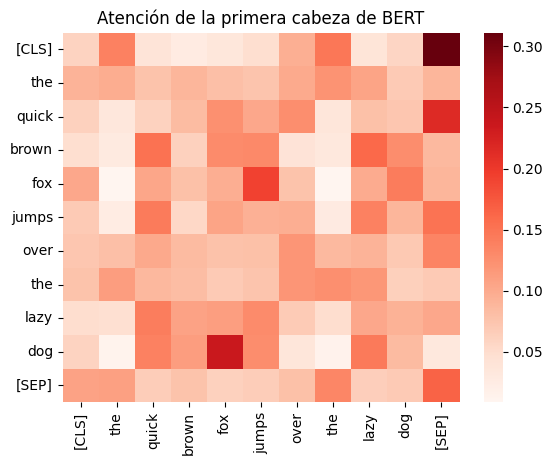

In [ ]:
attn = outputs.attentions[0][0]  # Última capa, primera cabeza


sns.heatmap(attn[0].detach().numpy(), xticklabels=tokens, yticklabels=tokens, cmap="Reds")
plt.title("Atención de la primera cabeza de BERT")
plt.show()